<a href="https://colab.research.google.com/github/MounishaChalasani/MounishaChalasani-INFO5731_Assignment_One_fall2022/blob/main/INFO5731_Assignment_Four_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
# Write your code here

import pandas as pd
from google.colab import files
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel

In [26]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews.csv')
print(reviews.Review)

0      The movie affects you in a way that makes it p...
1      When I heard everyone saying that this is the ...
2      Truly a masterpiece, The Best Hollywood film o...
3      I have seen Joker yesterday at Venice an early...
4      I get why some people hate this . It's because...
                             ...                        
866    I didn't know what to expect going in, but com...
867    This is without a doubt one of the best films ...
868    Wow! Truly impressed, nothing more to say.\n\n...
869    'Joker' is the type of film that you want to r...
870    Just to spite the person below me. Reminds me ...
Name: Review, Length: 871, dtype: object


In [27]:
import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

word = set(nltk.corpus.words.words())

def get_words(X):
  stem = WordNetLemmatizer()
  english_stopword = stopwords.words("english")
  bag_words = []
  for sen in range(0, len(X)):
      doc = re.sub(r'\W', ' ', str(X[sen]))
      doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
      doc = re.sub(r'\s+', ' ', doc, flags=re.I)
      doc = re.sub(r'^b\s+', '', doc)
      doc = re.sub(r'\d+','',doc)
      doc = doc.lower()
      doc = doc.split()
      doc = [stem.lemmatize(word) for word in doc]
      doc = [word for word in doc if word not in english_stopword]
      doc = ' '.join(doc)
      doc = [word for word in nltk.wordpunct_tokenize(doc) if word.lower() in word or not word.isalpha()]
      bag_words.append(doc)
  return bag_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews.csv')
words  = get_words(data["Review"])
print(len(words))
print(words)

871
[['movie', 'affect', 'way', 'make', 'physically', 'painful', 'experience', 'good', 'way'], ['heard', 'everyone', 'saying', 'film', 'year', 'review', 'flooding', 'wa', 'quite', 'hyped', 'excited', 'movie', 'walked', 'cinema', 'felt', 'hollow', 'empty', 'continue', 'writing', 'let', 'say', 'film', 'year', 'real', 'masterpiece', 'cinematography', 'excellent', 'acting', 'incredible', 'side', 'character', 'bland', 'overly', 'dramatic', 'plot', 'heavily', 'relies', 'plot', 'twist', 'film', 'harsh', 'actually', 'fall', 'flat', 'face', 'good', 'point', 'though', 'phoenix', 'phenomenal', 'score', 'great', 'cinematography', 'also', 'incredible', 'plot', 'great', 'even', 'ha', 'plot', 'hole', 'scene', 'left', 'empty', 'film', 'year', 'nope'], ['truly', 'masterpiece', 'best', 'hollywood', 'film', 'one', 'best', 'film', 'decade', 'truly', 'best', 'film', 'bring', 'comic', 'book', 'chillingly', 'realistically', 'real', 'ife', 'remarkable', 'direction', 'cinematography', 'music', 'acting', 'peopl

In [29]:
def get_docs(docs):
    dict = corpora.Dictionary(docs)
    matrix = [dict.doc2bow(doc) for doc in docs]
    return dict,matrix

In [30]:
text_words=get_words(reviews['Review'])
dictionary,doc_matrix=get_docs(text_words)
model = LdaModel(doc_matrix, num_topics=10, id2word = dictionary, passes=20)
topics_str = model.print_topics(num_topics=10, num_words=10)

In [15]:
for i in range(len(topics_str)):
  print(i+1,"", topics_str[i])

1  (0, '0.024*"film" + 0.022*"joker" + 0.016*"wa" + 0.011*"movie" + 0.008*"character" + 0.007*"one" + 0.006*"phoenix" + 0.006*"make" + 0.006*"like" + 0.006*"story"')
2  (1, '0.049*"movie" + 0.017*"wa" + 0.012*"joker" + 0.011*"like" + 0.011*"people" + 0.009*"watch" + 0.008*"one" + 0.008*"film" + 0.008*"good" + 0.006*"really"')
3  (2, '0.007*"real" + 0.005*"performance" + 0.004*"every" + 0.004*"joaquin" + 0.004*"masterpiece" + 0.004*"wa" + 0.003*"mehhh" + 0.003*"everybody" + 0.003*"deserves" + 0.003*"truly"')
4  (3, '0.030*"movie" + 0.014*"wa" + 0.012*"joker" + 0.008*"like" + 0.007*"society" + 0.007*"see" + 0.006*"make" + 0.006*"film" + 0.006*"people" + 0.005*"great"')
5  (4, '0.024*"film" + 0.020*"movie" + 0.020*"joker" + 0.011*"phoenix" + 0.011*"character" + 0.009*"wa" + 0.009*"one" + 0.009*"arthur" + 0.009*"performance" + 0.008*"joaquin"')
6  (5, '0.047*"movie" + 0.023*"joker" + 0.019*"wa" + 0.013*"phoenix" + 0.013*"joaquin" + 0.010*"film" + 0.008*"acting" + 0.008*"great" + 0.007*"one

In [35]:
top_topics = model.top_topics(doc_matrix)
for i in range(len(top_topics)):
  print("\nTopic: ", i+1)
  print()
  for j in range(len(top_topics[i][0])):
    print(top_topics[i][0][j][1])


Topic:  1

movie
joker
film
really
one
like
make
people
ha
story
phoenix
see
think
character
wa
performance
good
batman
get
joaquin

Topic:  2

joker
movie
character
arthur
phoenix
really
wa
joaquin
story
fleck
life
clown
man
like
ha
performance
society
world
dark
film

Topic:  3

film
joker
movie
wa
one
arthur
character
phoenix
like
joaquin
comic
time
people
feel
make
ha
performance
society
book
also

Topic:  4

film
joker
movie
wa
phoenix
good
performance
joaquin
best
great
one
oscar
well
would
time
like
ha
actor
story
character

Topic:  5

movie
joker
film
wa
character
one
ha
make
see
batman
arthur
like
story
feel
dark
many
phoenix
comic
life
get

Topic:  6

movie
joker
wa
phoenix
film
joaquin
performance
character
one
story
ha
arthur
see
like
great
acting
time
phillips
way
todd

Topic:  7

movie
joker
character
good
film
dark
story
phoenix
performance
really
wa
people
comic
like
feel
batman
joaquin
scene
great
many

Topic:  8

movie
wa
joker
like
character
phoenix
joaquin
dark
art

In [36]:
lsa_model = LsiModel(doc_matrix, num_topics=10, id2word = dictionary)  
lsa = lsa_model.print_topics(num_topics=i, num_words=i)

In [37]:
for i in range(len(lsa)):
    print("Topic:",i+1,"", lsa[i])

Topic: 1  (0, '0.452*"movie" + 0.391*"joker" + 0.358*"film" + 0.249*"wa" + 0.160*"phoenix" + 0.157*"character" + 0.157*"one" + 0.148*"arthur" + 0.141*"like"')
Topic: 2  (1, '-0.703*"movie" + 0.657*"film" + 0.068*"phoenix" + 0.051*"one" + -0.042*"like" + 0.040*"time" + 0.040*"fleck" + 0.039*"many" + 0.039*"character"')
Topic: 3  (2, '0.705*"wa" + -0.471*"joker" + 0.229*"film" + -0.157*"arthur" + -0.108*"fleck" + -0.089*"phoenix" + 0.088*"movie" + -0.078*"man" + 0.071*"good"')
Topic: 4  (3, '-0.544*"wa" + 0.463*"film" + 0.408*"movie" + -0.375*"joker" + -0.176*"arthur" + -0.092*"character" + -0.070*"ledger" + -0.068*"story" + 0.061*"like"')
Topic: 5  (4, '-0.516*"joker" + 0.495*"arthur" + 0.245*"phoenix" + 0.217*"fleck" + 0.149*"phillips" + 0.130*"character" + -0.119*"really" + -0.113*"people" + 0.097*"joaquin"')
Topic: 6  (5, '-0.339*"one" + 0.273*"joker" + -0.263*"like" + -0.255*"people" + 0.180*"phoenix" + 0.171*"movie" + -0.168*"make" + 0.167*"film" + 0.157*"joaquin"')
Topic: 7  (6, '

In [38]:
info = lsa_model.show_topics(formatted=False)

for i in range(len(info)):
  print("\nTopic: ", i+1)
  print()
  for j in range(len(info[i][1])):
    print(info[i][1][j][0])


Topic:  1

movie
joker
film
wa
phoenix
character
one
arthur
like
joaquin

Topic:  2

movie
film
phoenix
one
like
time
fleck
many
character
performance

Topic:  3

wa
joker
film
arthur
fleck
phoenix
movie
man
good
would

Topic:  4

wa
film
movie
joker
arthur
character
ledger
story
like
best

Topic:  5

joker
arthur
phoenix
fleck
phillips
character
really
people
joaquin
good

Topic:  6

one
joker
like
people
phoenix
movie
make
film
joaquin
performance

Topic:  7

performance
arthur
phoenix
one
joaquin
film
best
oscar
joker
also

Topic:  8

character
story
good
one
people
really
like
best
great
arthur

Topic:  9

like
ha
comic
one
book
really
feel
good
great
get

Topic:  10

people
ha
like
comic
book
phoenix
performance
one
joaquin
phillips


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [39]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [84]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv',nrows=2008)

In [85]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2003,This Showtime cable film features a talented c...,positive
2004,This is a film i decided to go and see because...,positive
2005,"I happened to catch this supposed ""horror"" fli...",negative
2006,This movie is my all time favorite!!! You real...,positive


In [86]:
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=2000)
tfidf.fit(data['review'])

TfidfVectorizer(max_features=2000, token_pattern='\\w{1,}')

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2,random_state=50)

In [88]:
def transform_train_data(train, test, vect):
  x_test =  tfidf.transform(test)
  x_train =  vect.transform(train)
  return x_test, x_train

In [89]:
def transform_test_data(train, test):
  en = preprocessing.LabelEncoder()
  valid = en.fit_transform(test)
  train = en.fit_transform(train)
  return valid, train

In [90]:
x_train, x_test= transform_train_data(X_train, X_test, tfidf)
y_train, y_test = transform_test_data(y_train, y_test)

In [91]:
classification = LinearSVC()
classification.fit(x_train, y_train)
y_pred = classification.predict(x_test)
print("Accuracy_Score:", accuracy_score(y_test, y_pred))
print("Precision_score:",precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1_Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy_Score: 0.7777085927770859
Precision_score: 0.7777790306164398
Recall_score 0.7777085927770859
F1_Score: 0.7776348467185847


In [92]:
classification = KNeighborsClassifier()
classification.fit(x_train, y_train)
y_pred = classification.predict(x_test)
print("Accuracy_Score:", accuracy_score(y_test, y_pred))
print("Precision_score:",precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1_Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy_Score: 0.6027397260273972
Precision_score: 0.607669604900733
Recall_score 0.6027397260273972
F1_Score: 0.5998577273629265


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [40]:
# Write your code here

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [41]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

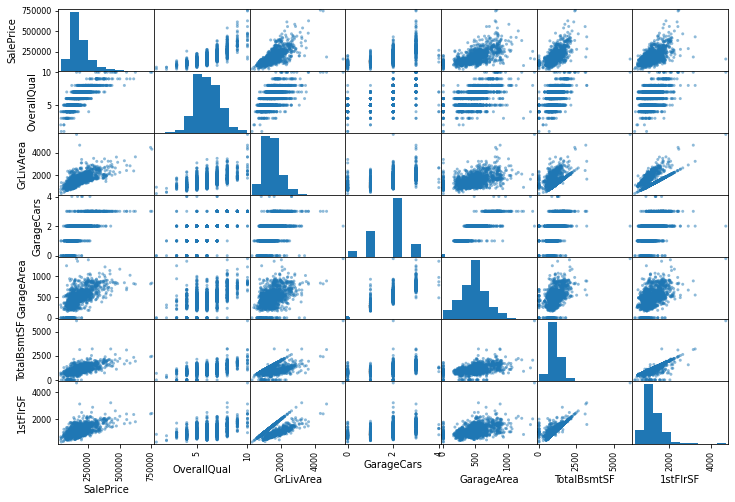

In [43]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']
scatter_matrix(train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

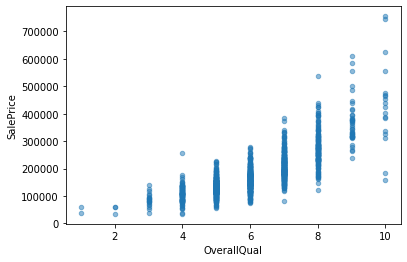

In [44]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

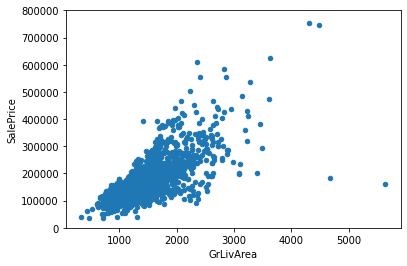

In [45]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

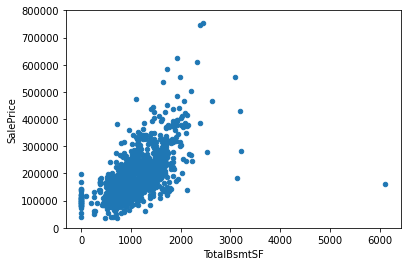

In [46]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

In [59]:
from collections import Counter

counter_train=train.select_dtypes(include=np.number).columns.tolist()
counter_test=test.select_dtypes(include=np.number).columns.tolist()

colms=train.columns.values.tolist()
cnt= list((Counter(colms)-Counter(counter_train)).elements())

In [60]:
test[counter_test]=test[counter_test].fillna(0)
train[counter_train]=train[counter_train].fillna(0)
test[cnt]=train[cnt].fillna('Unlabeled')
train[cnt]=train[cnt].fillna('Unlabeled')

In [61]:
training = pd.get_dummies(train, columns=cnt)
X_train=training.drop(['SalePrice', 'Id'],axis=1)
y_train=training['SalePrice']

In [62]:
test_set = pd.get_dummies(test, columns=cnt)
x_test=test_set.drop(['Id'],axis=1)

In [63]:
X_train= train[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
y_train = train["SalePrice"]
X_test = test[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
test.fillna(0, inplace = True)

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
regressor.score(X_train, y_train)

0.761917951186283

In [66]:
predictions = regressor.predict(X_test)
y_pred = pd.DataFrame({'Sale Price prediction': predictions})
y_pred

,Sale Price prediction
0,113457.503265
1,165325.401681
2,157177.041113
3,179836.887801
4,227017.198181
...,...
1454,59852.316790
1455,78847.395196
1456,151715.379533
1457,92258.212328
